In [170]:
# Import Modules
import sys
sys.path.insert(0, r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\Modules')
import sysconfig;
from operator import itemgetter
from math import isnan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines
from scipy.io import loadmat
import os
import Actigraph_Metrics
import tsfel
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import seaborn as sns
os.chdir(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\Patient9')

In [171]:
# Load Files
filename = 'Patient9_5MIN_SW_AllSBS.mat'

x_mag = (loadmat(filename)["x_mag"])
SBS = loadmat(filename)["sbs"]

In [172]:
# Calculate Features
AUC = []
PEAK_PEAK = []
Mean = []

for i in range(x_mag.shape[0]):
    signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:],100)
    x = []
    for i in range(len(signal)):
        x.append(i)
    Mean.append(np.mean(signal))
    AUC.append(Actigraph_Metrics.calc_area_under_curve(x,signal))
    PEAK_PEAK.append(max(signal)-min(signal))

In [173]:
# Get Time Data
sbs_sheet = pd.read_excel(r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData\9\Patient_9_SBS_Scores.xlsx', header=2, usecols='A:C')
sbs_sheet['dts'] = pd.to_datetime(sbs_sheet['Time_uniform'], format='%m/%d/%Y %H:%M:%S %p')
time_data = pd.to_datetime(sbs_sheet['dts'])

# Convert to seconds with the first data point being 0 seconds
time_data_seconds = (time_data - time_data.iloc[0]).dt.total_seconds()
time_data_seconds = np.delete(time_data_seconds, 24)
# SBS = np.delete(SBS[0], 24)
# mean = np.delete(Mean, 24)
print(time_data_seconds)

[     0.   6120.   7200.   9660.  14400.  18300.  19140.  22440.  45480.
  46080.  46800.  54000.  57420.  89460.  93600.  97320.  98640. 100800.
 104160. 104520. 111120. 114840. 117600. 121920. 129600. 186420. 187020.
 191100. 193320. 197400. 200460. 205260. 212400. 217260. 222420. 223200.
 239100. 241920. 242700. 244800. 251520. 561060. 684000.]


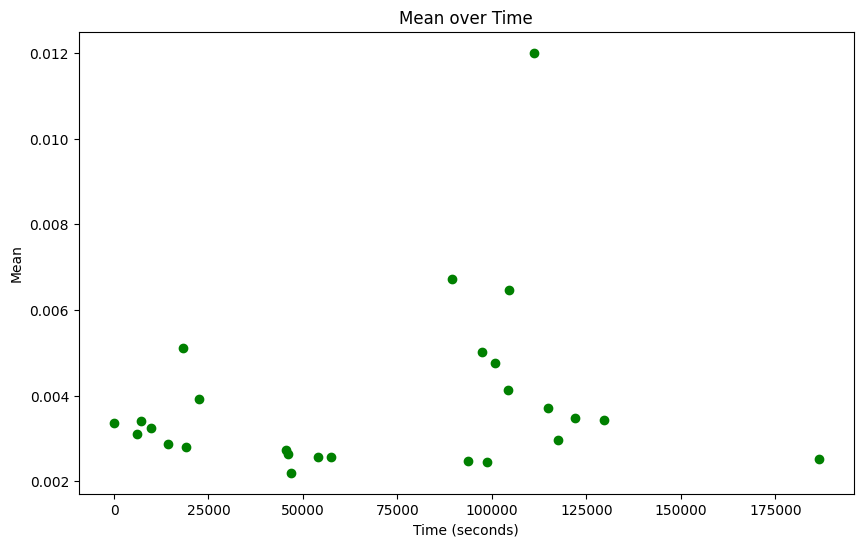

In [174]:
# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

time_data_seconds = time_data_seconds[:len(Mean)]

# Plot mean against time
plt.scatter(time_data_seconds, Mean, color='green')

# Labeling the axes
plt.xlabel('Time (seconds)')
plt.ylabel('Mean')

# Title for the plot
plt.title('Mean over Time')

# Display the plot
plt.show()


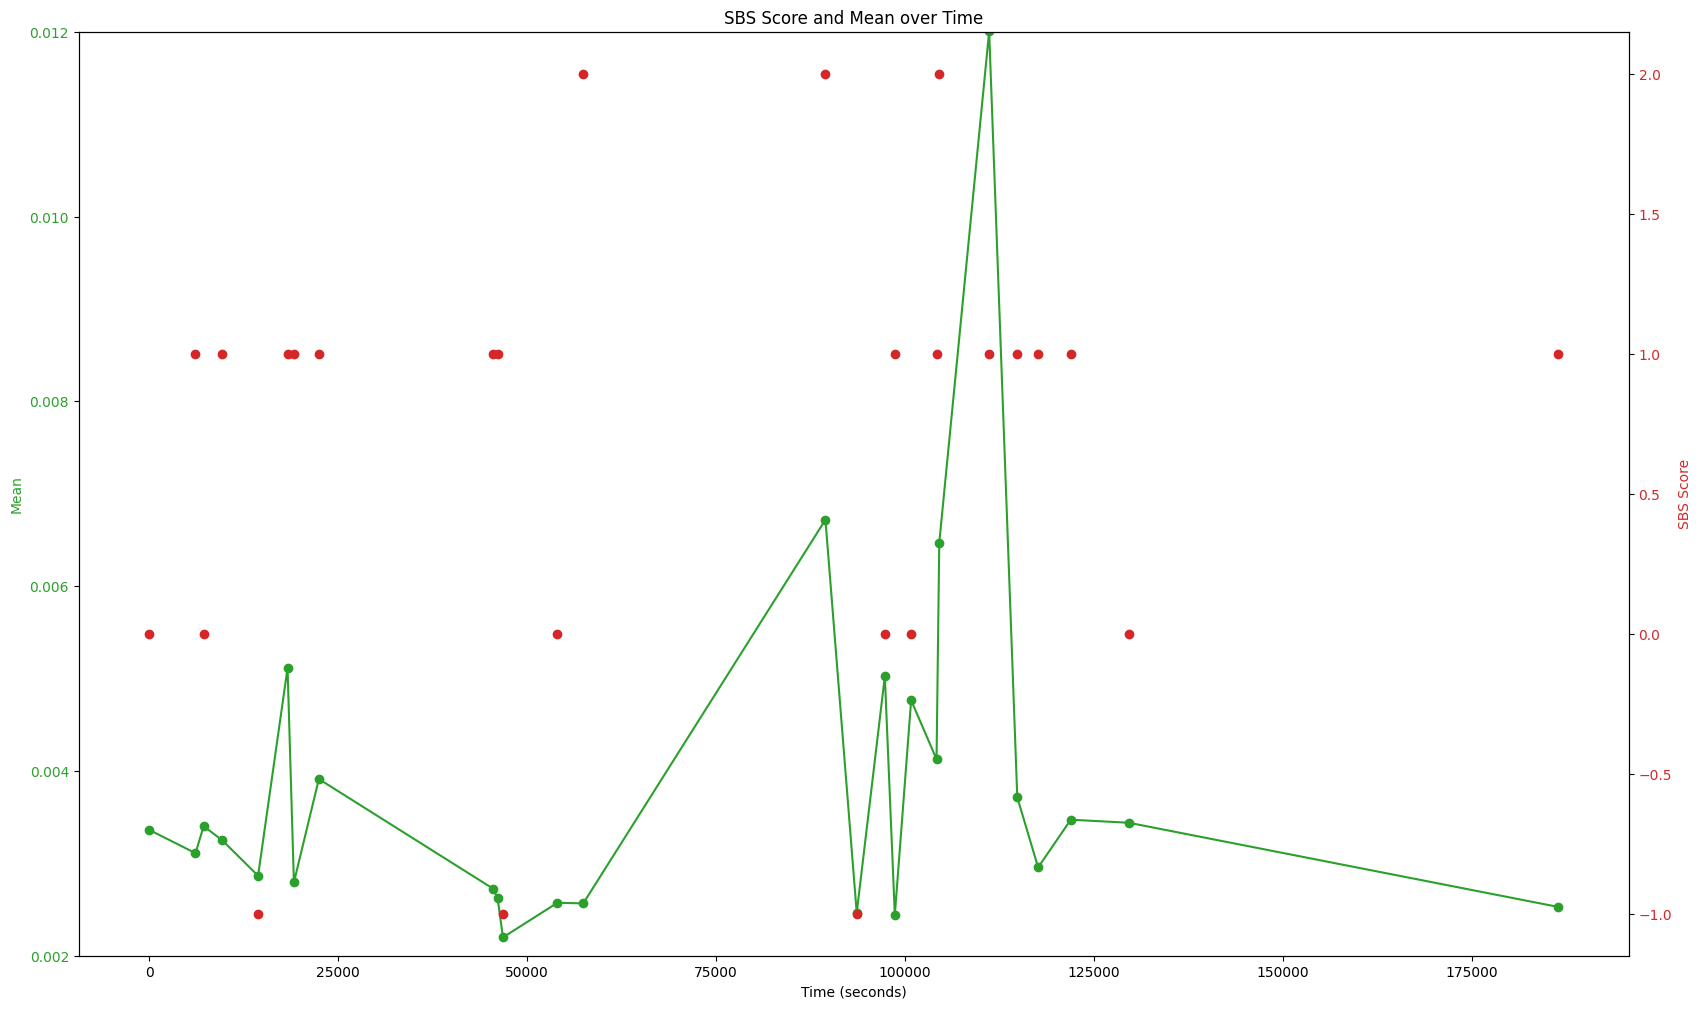

In [175]:
fig, ax1 = plt.subplots(figsize=(20, 12))  # Adjust figure size as needed

# Plot Mean on the left side
color = 'tab:green'
ax1.plot(time_data_seconds, Mean, color=color, marker='o', label='Mean')
ax1.set_ylabel('Mean', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.002, 0.012)  # Set y-axis limits for Mean

# Instantiate a second y-axis for SBS scores on the right side
ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(time_data_seconds, SBS, color=color, marker='o', label='SBS Score')
ax2.set_ylabel('SBS Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Labeling the x-axis
ax1.set_xlabel('Time (seconds)')

# Title for the plot
ax1.set_title('SBS Score and Mean over Time')

# Show the plot
plt.show()

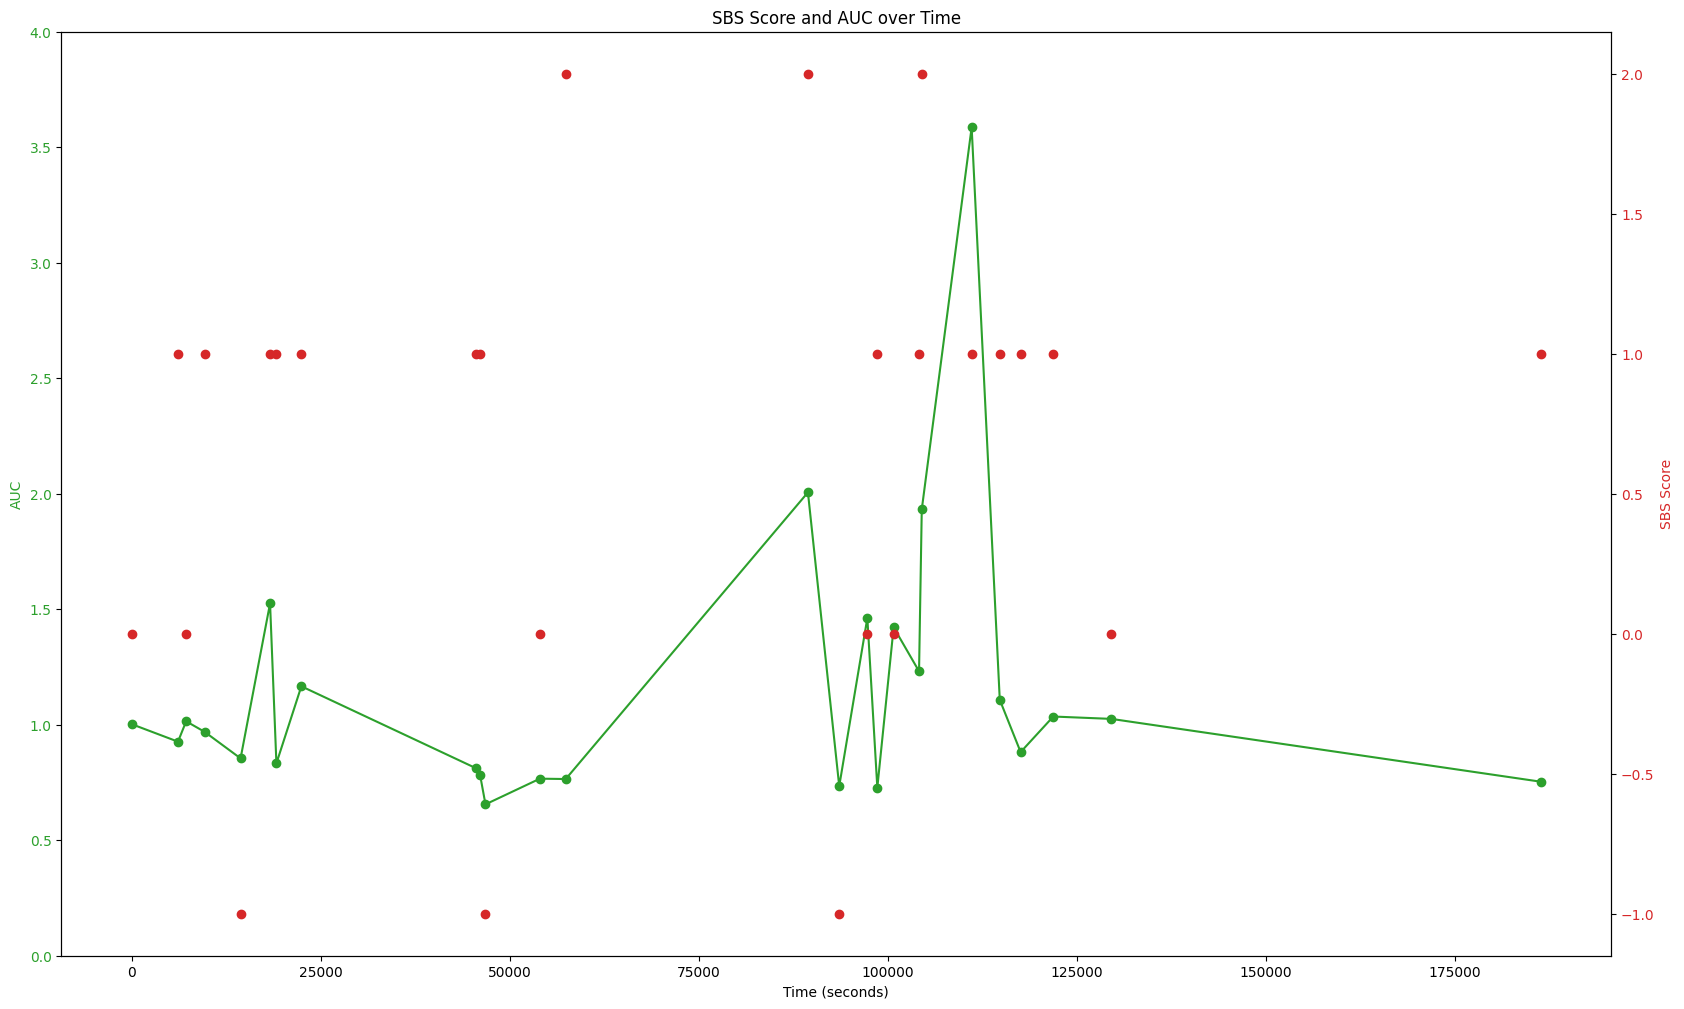

In [176]:
fig, ax1 = plt.subplots(figsize=(20, 12))  # Adjust figure size as needed

# Plot Mean on the left side
color = 'tab:green'
ax1.plot(time_data_seconds, AUC, color=color, marker='o', label='AUCn')
ax1.set_ylabel('AUC', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 4)  # Set y-axis limits for Mean

# Instantiate a second y-axis for SBS scores on the right side
ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(time_data_seconds, SBS, color=color, marker='o', label='SBS Score')
ax2.set_ylabel('SBS Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Labeling the x-axis
ax1.set_xlabel('Time (seconds)')

# Title for the plot
ax1.set_title('SBS Score and AUC over Time')

# Show the plot
plt.show()

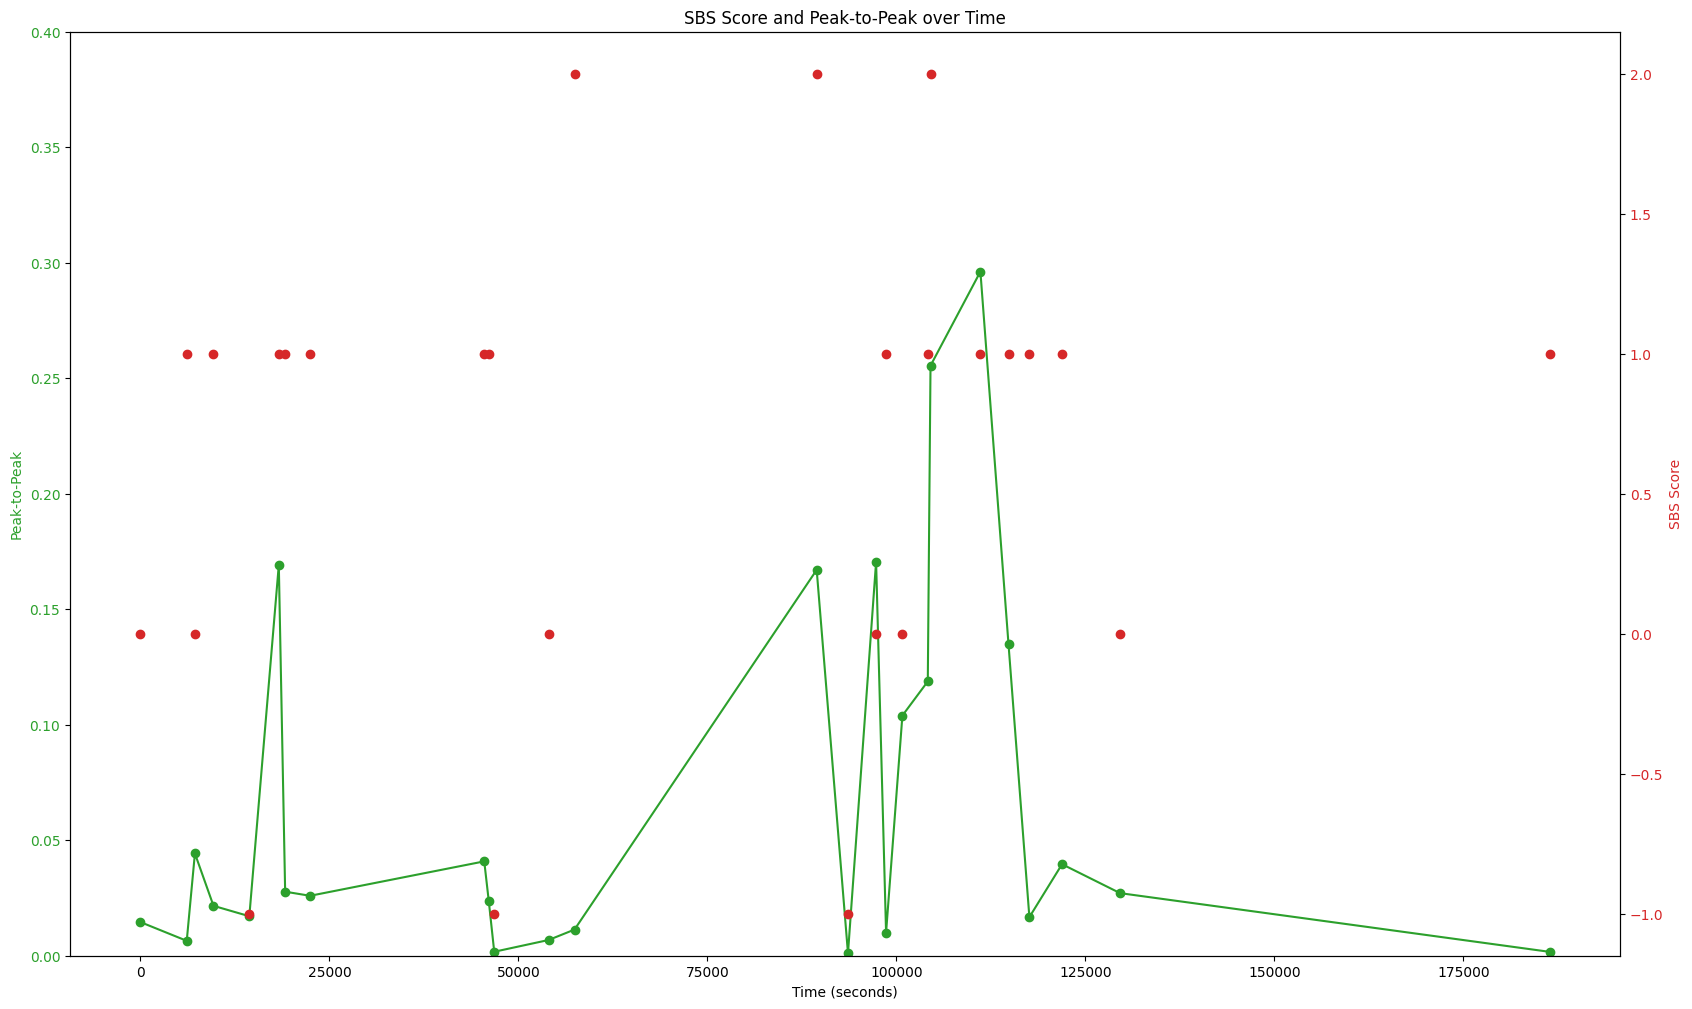

In [177]:
fig, ax1 = plt.subplots(figsize=(20, 12))  # Adjust figure size as needed

# Plot Mean on the left side
color = 'tab:green'
ax1.plot(time_data_seconds, PEAK_PEAK, color=color, marker='o', label='Peak_Peak')
ax1.set_ylabel('Peak-to-Peak', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 0.4)  # Set y-axis limits for Mean

# Instantiate a second y-axis for SBS scores on the right side
ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(time_data_seconds, SBS, color=color, marker='o', label='SBS Score')
ax2.set_ylabel('SBS Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Labeling the x-axis
ax1.set_xlabel('Time (seconds)')

# Title for the plot
ax1.set_title('SBS Score and Peak-to-Peak over Time')

# Show the plot
plt.show()